# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key



In [3]:
# Import citipy to determine the cities based on latitude and longitude
# note to self: calling this module would only work in a seperate cell --
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city = 'brak'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = query_url + city
city_weather =  requests.get(city_url).json()
city_weather

{'coord': {'lon': 14.2714, 'lat': 27.5496},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 19.25,
  'feels_like': 18.01,
  'temp_min': 19.25,
  'temp_max': 19.25,
  'pressure': 1016,
  'humidity': 30,
  'sea_level': 1016,
  'grnd_level': 974},
 'visibility': 10000,
 'wind': {'speed': 5.58, 'deg': 70, 'gust': 9.85},
 'clouds': {'all': 0},
 'dt': 1712708578,
 'sys': {'country': 'LY', 'sunrise': 1712724186, 'sunset': 1712769884},
 'timezone': 7200,
 'id': 2218478,
 'name': 'Brak',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
# url = # YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country_code = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country_code,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | mejit
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | tazacorte
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | magadan
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | barra de santo antonio
Processing Record 9 of Set 1 | nar'yan-mar
Processing Record 10 of Set 1 | shenjiamen
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | corner brook
Processing Record 13 of Set 1 | shuangcheng
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | the bottom
Processing Record 16 of Set 1 | smithers
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | mawlaik
Processing Record 19 of Set 1 | ceeldheer
Processing Record 20 of Set 1 | barranca
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 | ghat
Process

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df= pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,8.38,96,100,15.15,TF,1712709322
1,mejit,10.2753,170.8646,26.89,84,100,10.28,MH,1712709564
2,avarua,-21.2078,-159.7750,26.03,89,75,3.60,CK,1712709564
3,tazacorte,28.6290,-17.9293,19.53,52,20,7.72,ES,1712709564
4,hithadhoo,-0.6000,73.0833,29.47,73,71,4.03,MV,1712709564


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.38,96,100,15.15,TF,1712709322
1,mejit,10.2753,170.8646,26.89,84,100,10.28,MH,1712709564
2,avarua,-21.2078,-159.7750,26.03,89,75,3.60,CK,1712709564
3,tazacorte,28.6290,-17.9293,19.53,52,20,7.72,ES,1712709564
4,hithadhoo,-0.6000,73.0833,29.47,73,71,4.03,MV,1712709564


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [46]:
import datetime                         # note to self: could not call the time module; use datetime instead --
# double check the format for displaying on the graph
datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d %H:%M:%S')  # do not need the time --
datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d')

'2024-04-09'

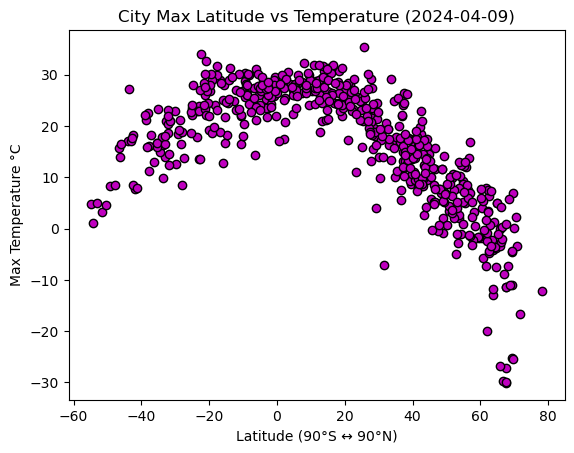

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
Unix_timestamp_converted = datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs Temperature ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Max Temperature \u00B0C")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

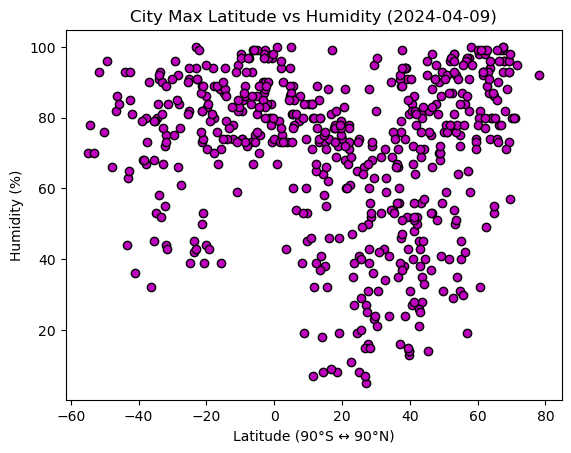

In [129]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
Unix_timestamp_converted = datetime.datetime.fromtimestamp(city_date).strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs Humidity ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

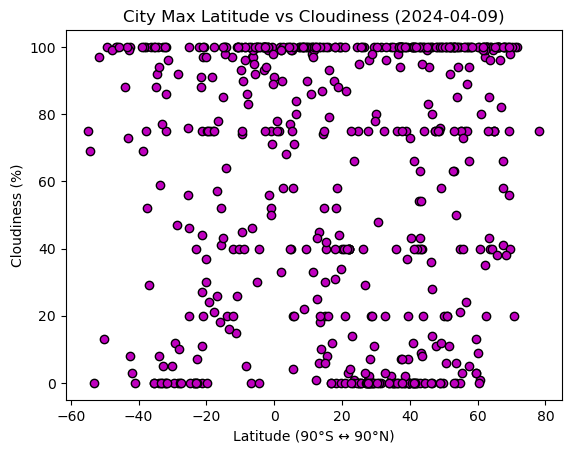

In [147]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Cloudiness ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

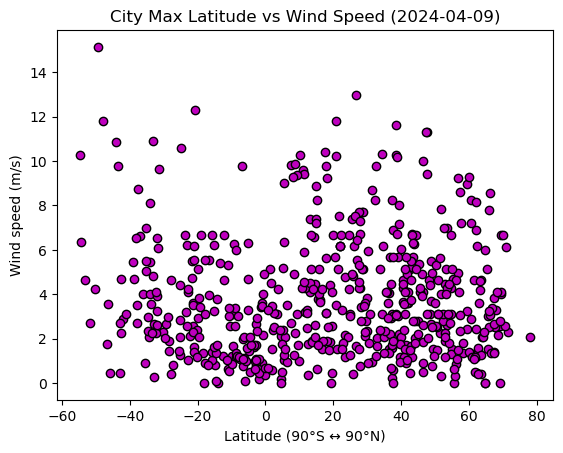

In [132]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", color="m", edgecolors = 'k')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Wind Speed ({Unix_timestamp_converted})")
plt.xlabel("Latitude (90\u00B0S \u2194 90\u00B0N)")
plt.ylabel("Wind speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [148]:
# Define a function to create Linear Regression plots
import scipy.stats as st

# the function uses (6) variables: the x,y coordinates of the data for plotting, 
#       x,y coordinates for positioning the regression equation, and labels for the x & y axis  --

def Linear_Regression (x_axis_scatter, y_axis_scatter, eq_x, eq_y, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_scatter, y_axis_scatter)
    regress_values = x_axis_scatter * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation =st.pearsonr(x_axis_scatter, y_axis_scatter)
    print(f"The r-value is: {rvalue**2}")  
    plt.scatter(x_axis_scatter, y_axis_scatter, marker="o", color="cornflowerblue", edgecolors = 'k')
    plt.plot(x_axis_scatter,regress_values,"r-")
    plt.figtext(eq_x, eq_y, line_eq, fontsize=15, color = "r") 
    plot_title = (f"city latitude vs {y_label} ({Unix_timestamp_converted})")
    plt.title(plot_title)
    plt.xlabel(f"Latitude ({x_label} hemisphere)")
    plt.ylabel(y_label)  

# reference for matplotlib colors: https://en.wikipedia.org/wiki/X11_color_names; go to 'X11 color names' table;
#       take out space in color names with multiple words  --

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mejit,10.2753,170.8646,26.89,84,100,10.28,MH,1712709564
3,tazacorte,28.6290,-17.9293,19.53,52,20,7.72,ES,1712709564
5,magadan,59.5667,150.8000,-1.93,74,3,2.45,RU,1712709564
6,hadibu,12.6500,54.0333,26.07,77,25,1.77,YE,1712709565
8,nar'yan-mar,67.6713,53.0870,-11.48,96,100,2.51,RU,1712709565


In [111]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,8.38,96,100,15.15,TF,1712709322
2,avarua,-21.2078,-159.7750,26.03,89,75,3.60,CK,1712709564
4,hithadhoo,-0.6000,73.0833,29.47,73,71,4.03,MV,1712709564
7,barra de santo antonio,-9.4047,-35.5072,25.60,82,45,3.09,BR,1712709565
13,margaret river,-33.9500,115.0667,17.26,58,0,5.47,AU,1712709567


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7509784787682292


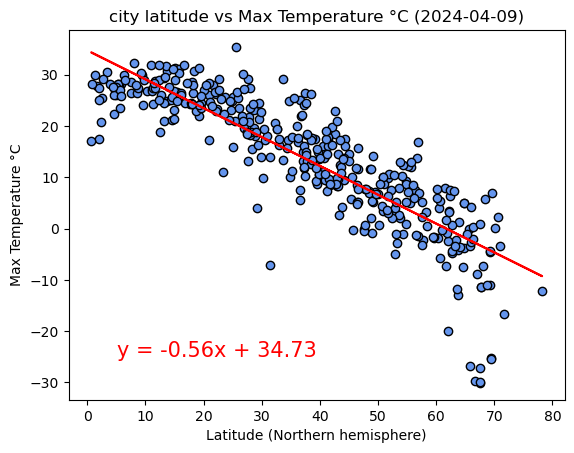

In [146]:
# Linear regression on Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Max Temp']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.2, 0.2, "Northern", "Max Temperature \u00B0C")

The r-squared is: 0.5217341585409663


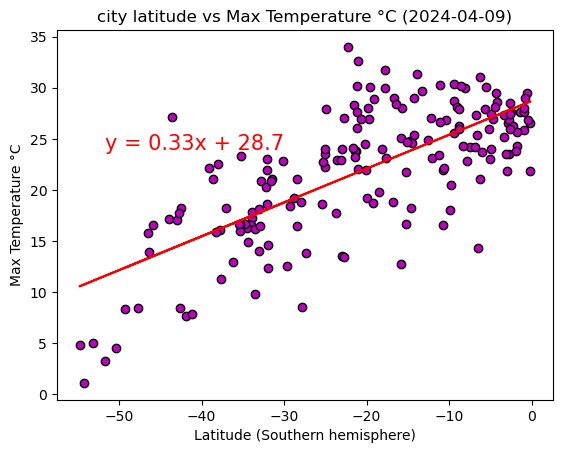

In [120]:
# Linear regression on Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df['Max Temp']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.2, 0.63, "Southern", "Max Temperature \u00B0C")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05569222642624914


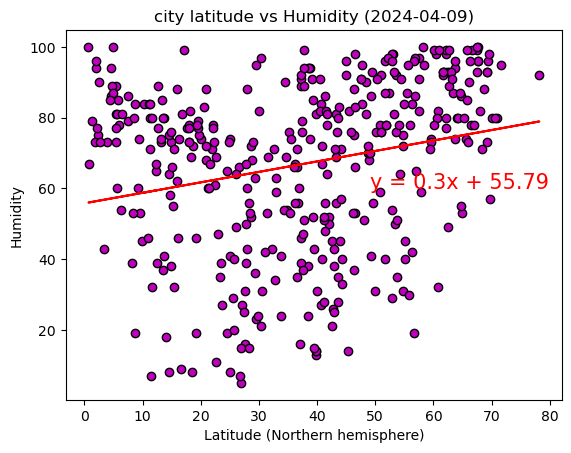

In [110]:
# Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Humidity']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.6, 0.55, "Northern", "Humidity")

The r-squared is: 0.07908429655945422


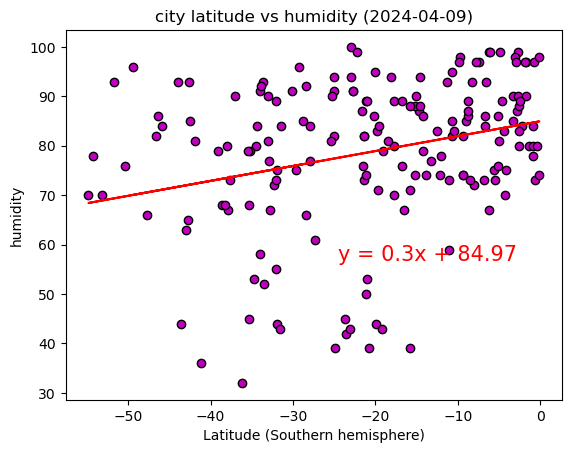

In [122]:
# Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df["Humidity"]
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.55, 0.4, "Southern", "humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.011586632613135861


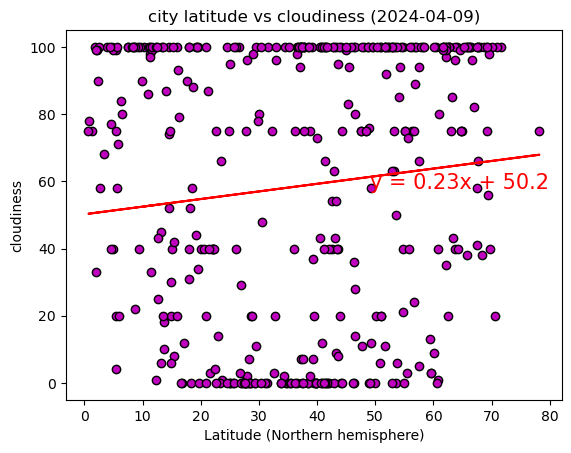

In [123]:
# Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Cloudiness']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.6, 0.55, "Northern", "cloudiness")

The r-squared is: 0.04432639798435683


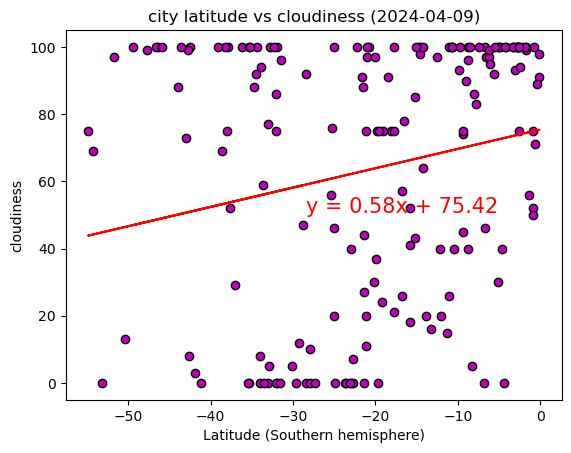

In [124]:
# Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df['Cloudiness']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.5, 0.5, "Southern", "cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00982420473653716


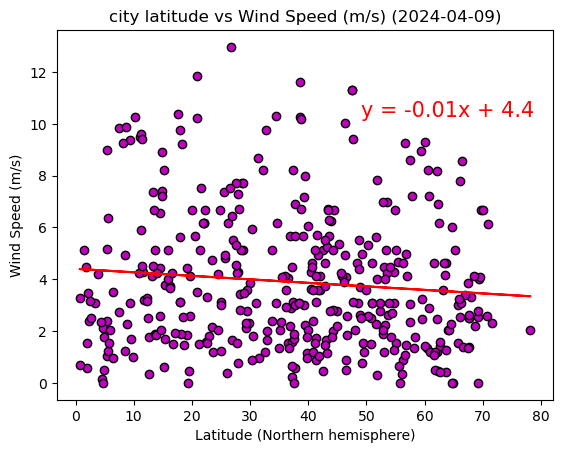

In [128]:
# Northern Hemisphere
x_axis_scatter = northern_hemi_df['Lat'] 
y_axis_scatter = northern_hemi_df['Wind Speed']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.6, 0.7, "Northern", "Wind Speed (m/s)")

The r-squared is: 0.17035938569377312


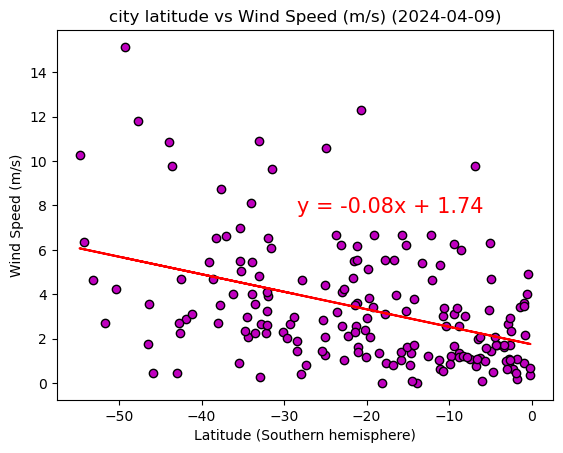

In [115]:
# Southern Hemisphere
x_axis_scatter = southern_hemi_df['Lat'] 
y_axis_scatter = southern_hemi_df['Wind Speed']
Linear_Regression(x_axis_scatter, y_axis_scatter, 0.5, 0.5, "Southern", "Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE